# Домашняя работа №4. Линейная регрессия

Цель работы: Обучить модель линейной регрессии с настройкой гиперпараметров.

### Работа с набором данных для задачи линейной регрессии (целевая переменная - непрерывное числовое значение)

## Задание №1

Цель: Получить чистые данные

#### Предварительная подготовка данных
* Заполнить пропуски в данных подходящими значениями (например, 0 для числовых значений, other для категориальных значений).
* Проверить датасет на дубликаты. Удалить при наличии.
* Закодировать категориальные значения. Например, создать новые булевые признаки (OneHotEncoder), или назначить число для каждого значения (LabelEncoder).
* Удалить столбцы с уникальными значениями, при наличии.
* К числовым признакам применить масштабирование со средним нулевым значением.
* Разделить на тренировочную и обучающую выборки.

##Решение задания №1

In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [62]:
df = pd.read_csv('/content/bike/train.csv')

Пропусков в данном датасэте нет:

In [63]:
print("Пропуски в данных:")
print(df.isnull().sum())

Пропуски в данных:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


Дубликатов в данном датасэте нет:

In [64]:
duplicates = df.duplicated()
if duplicates.sum() > 0:
    print(f"Удалено {duplicates.sum()} дубликатов.")
    df.drop_duplicates(inplace=True)
else:
    print("Дубликатов не обнаружено.")

Дубликатов не обнаружено.


Используем OneHotEncoder для создания новых булевых признаков

In [65]:
categorical_columns = ['season', 'holiday', 'workingday', 'weather']
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_data = ohe.fit_transform(df[categorical_columns]).toarray()
category_labels = ohe.get_feature_names_out(input_features=categorical_columns)
encoded_df = pd.DataFrame(encoded_data, columns=category_labels)

df = df.drop(columns=categorical_columns).join(encoded_df)

In [14]:
print(df.head())

              datetime  temp   atemp  humidity  windspeed  casual  registered  \
0  2011-01-01 00:00:00  9.84  14.395        81        0.0       3          13   
1  2011-01-01 01:00:00  9.02  13.635        80        0.0       8          32   
2  2011-01-01 02:00:00  9.02  13.635        80        0.0       5          27   
3  2011-01-01 03:00:00  9.84  14.395        75        0.0       3          10   
4  2011-01-01 04:00:00  9.84  14.395        75        0.0       0           1   

   count  season_1  season_2  season_3  season_4  holiday_0  holiday_1  \
0     16       1.0       0.0       0.0       0.0        1.0        0.0   
1     40       1.0       0.0       0.0       0.0        1.0        0.0   
2     32       1.0       0.0       0.0       0.0        1.0        0.0   
3     13       1.0       0.0       0.0       0.0        1.0        0.0   
4      1       1.0       0.0       0.0       0.0        1.0        0.0   

   workingday_0  workingday_1  weather_1  weather_2  weather_3  weat

Стобцов с уникальными значениями в датасэте не обнаружено



In [66]:
unique_columns = []
for column in df.columns:
    if len(df[column].unique()) == 1:
        unique_columns.append(column)

if len(unique_columns) > 0:
    df.drop(columns=unique_columns, inplace=True)
    print(f"Удалены столбцы с уникальными значениями: {unique_columns}")
else:
    print("Столбцы с уникальными значениями не обнаружены.")

Столбцы с уникальными значениями не обнаружены.


Масштабирование признаков

In [67]:
numeric_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
# в коде используется StandardScaler, который центрирует данные, приводя среднее значение к нулю, но также нормирует их, деля на стандартное отклонение
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)

df = df.drop(columns=numeric_columns).join(scaled_df)

In [20]:
print(df.head())

              datetime  season_1  season_2  season_3  season_4  holiday_0  \
0  2011-01-01 00:00:00       1.0       0.0       0.0       0.0        1.0   
1  2011-01-01 01:00:00       1.0       0.0       0.0       0.0        1.0   
2  2011-01-01 02:00:00       1.0       0.0       0.0       0.0        1.0   
3  2011-01-01 03:00:00       1.0       0.0       0.0       0.0        1.0   
4  2011-01-01 04:00:00       1.0       0.0       0.0       0.0        1.0   

   holiday_1  workingday_0  workingday_1  weather_1  weather_2  weather_3  \
0        0.0           1.0           0.0        1.0        0.0        0.0   
1        0.0           1.0           0.0        1.0        0.0        0.0   
2        0.0           1.0           0.0        1.0        0.0        0.0   
3        0.0           1.0           0.0        1.0        0.0        0.0   
4        0.0           1.0           0.0        1.0        0.0        0.0   

   weather_4      temp     atemp  humidity  windspeed    casual  registere

Делим на тренировочную и тестовую выборки:

In [68]:
X = df.drop(columns=['count', 'datetime'])
y = df['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Задание №2

#### Обучение модели линейной регресии
* Обучите модель линейно регресии методом градиентного спуска с помощь класса SGDRegressor в Sklearn с параметрами по умолчанию.
* Вычислить метрики R2, RMSE на тренировочной и тестовой выборках.
* Сделать вывод о качестве обученной модели.

##Решение задания №2

In [33]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error

Обучение модели линейной регрессии методом градиентного спуска

In [40]:
model = SGDRegressor()
model.fit(X_train, y_train)

SGDRegressor()

Оценка модели на тренировочном и тестовом наборах

In [41]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [42]:
pd.DataFrame({
    'true': y_train,
    'predicted': y_pred_train
}).head()

pd.DataFrame({
    'true': y_test,
    'predicted': y_pred_test
}).head()

,true,predicted
3133,-0.356495,-0.356091
5786,-0.985856,-0.986842
5224,-0.157749,-0.157802
8953,0.228700,0.228865
8054,0.167972,0.168281


Расчет метрик: R2 и RMSE

In [43]:
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

Анализ результатов

Слишком идеальные метрики..



In [44]:
print("Метрики на тренировочном наборе:")
print(f"R2: {r2_train:.3f}, RMSE: {rmse_train:.3f}")

print("\nМетрики на тестовом наборе:")
print(f"R2: {r2_test:.3f}, RMSE: {rmse_test:.3f}")

Метрики на тренировочном наборе:
R2: 1.000, RMSE: 0.000

Метрики на тестовом наборе:
R2: 1.000, RMSE: 0.000


Вывод о качестве модели

In [45]:
if abs(r2_train - r2_test) <= 0.05:
    print("\nМодель хорошо обобщает данные, переобучения нет.")
else:
    print("\nМодель, вероятно, переобучилась на тренировочных данных.")


Модель хорошо обобщает данные, переобучения нет.


## Задание №3

#### Настройка регуляризации модели
* Обучите модель линейно регресии методом градиентного спуска в Sklearn с параметров регуляризации l1, l2, elasticnet для значений alpha [0.01, 0.3, 0.5, 0.8].
* Вычислить метрики R2, RMSE на тренировочной и тестовой выборках.
* Сделать вывод о качестве обученной модели.
* Приведите графики со значениянми метрик.

##Решение задания №3

In [51]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

Определим используемые данные

In [52]:
alphas = [0.01, 0.3, 0.5, 0.8]

results = {
    'model': [],
    'alpha': [],
    'R2_train': [],
    'R2_test': [],
    'RMSE_train': [],
    'RMSE_test': []
}

Обучение модели выбранными методами

In [53]:
for alpha in alphas:
    # L1
    model_l1 = Lasso(alpha=alpha)
    model_l1.fit(X_train, y_train)

    y_train_pred_l1 = model_l1.predict(X_train)
    y_test_pred_l1 = model_l1.predict(X_test)

    results['model'].append('Lasso')
    results['alpha'].append(alpha)
    results['R2_train'].append(r2_score(y_train, y_train_pred_l1))
    results['R2_test'].append(r2_score(y_test, y_test_pred_l1))
    results['RMSE_train'].append(np.sqrt(mean_squared_error(y_train, y_train_pred_l1)))
    results['RMSE_test'].append(np.sqrt(mean_squared_error(y_test, y_test_pred_l1)))

    # L2
    model_l2 = Ridge(alpha=alpha)
    model_l2.fit(X_train, y_train)

    y_train_pred_l2 = model_l2.predict(X_train)
    y_test_pred_l2 = model_l2.predict(X_test)

    results['model'].append('Ridge')
    results['alpha'].append(alpha)
    results['R2_train'].append(r2_score(y_train, y_train_pred_l2))
    results['R2_test'].append(r2_score(y_test, y_test_pred_l2))
    results['RMSE_train'].append(np.sqrt(mean_squared_error(y_train, y_train_pred_l2)))
    results['RMSE_test'].append(np.sqrt(mean_squared_error(y_test, y_test_pred_l2)))

    # ElasticNet
    model_en = ElasticNet(alpha=alpha)
    model_en.fit(X_train, y_train)

    y_train_pred_en = model_en.predict(X_train)
    y_test_pred_en = model_en.predict(X_test)

    results['model'].append('ElasticNet')
    results['alpha'].append(alpha)
    results['R2_train'].append(r2_score(y_train, y_train_pred_en))
    results['R2_test'].append(r2_score(y_test, y_test_pred_en))
    results['RMSE_train'].append(np.sqrt(mean_squared_error(y_train, y_train_pred_en)))
    results['RMSE_test'].append(np.sqrt(mean_squared_error(y_test, y_test_pred_en)))

Запишем в один датафрэйм результаты обучения

In [54]:
results_df = pd.DataFrame(results)

Выведем на график полученные метрики

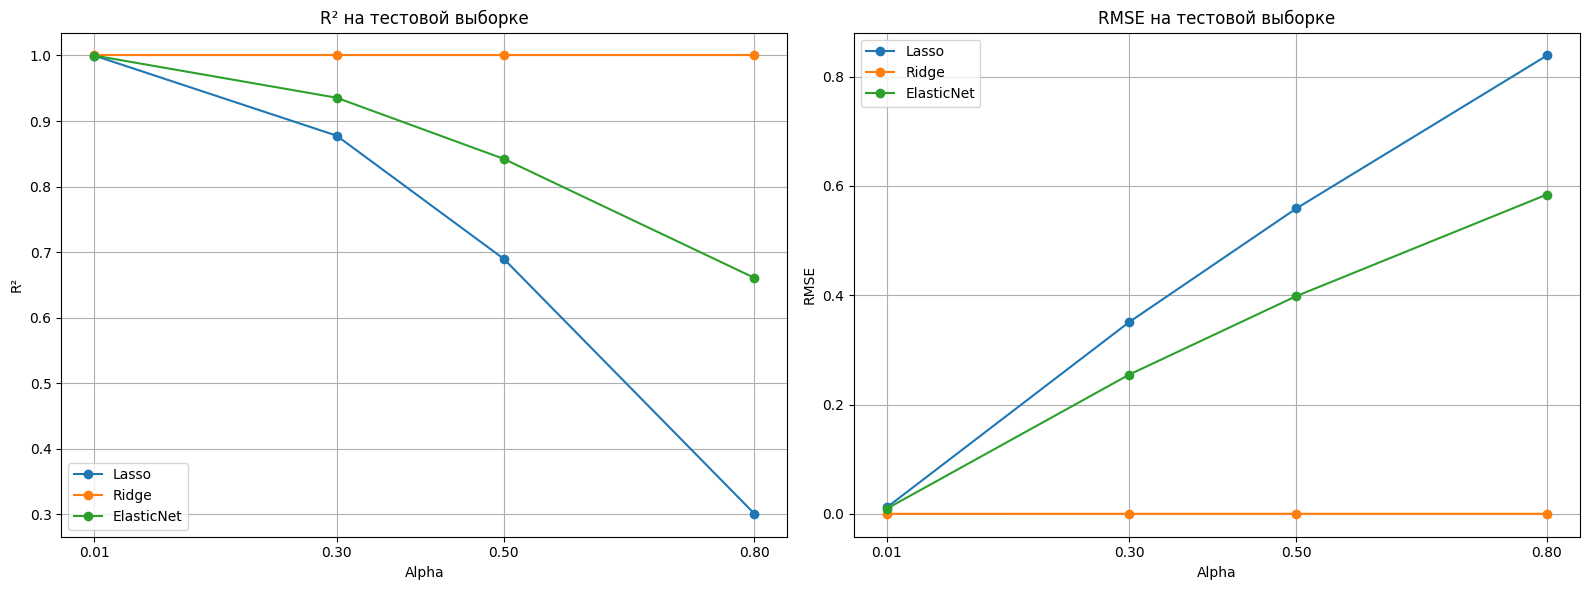

In [55]:
plt.figure(figsize=(16, 6))

# График R²
plt.subplot(1, 2, 1)
for model in results_df['model'].unique():
    subset = results_df[results_df['model'] == model]
    plt.plot(subset['alpha'], subset['R2_test'], marker='o', label=model)
plt.title('R² на тестовой выборке')
plt.xlabel('Alpha')
plt.ylabel('R²')
plt.xticks(alphas)
plt.legend()
plt.grid()

# График RMSE
plt.subplot(1, 2, 2)
for model in results_df['model'].unique():
    subset = results_df[results_df['model'] == model]
    plt.plot(subset['alpha'], subset['RMSE_test'], marker='o', label=model)
plt.title('RMSE на тестовой выборке')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.xticks(alphas)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Задание №4

#### Настройка гиперпараметров модели.
* Обучите модель линейно регресии методом градиентного спуска в Sklearn с лучшим параметров регуляризации и alpha значением при разном количестве итераций.
* Вычислить метрики R2, RMSE на тренировочной и тестовой выборках.
* Сделать вывод о качестве обученной модели.

## Решение задания №4

In [73]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

In [75]:
ridge = Ridge()

Использую GridSearchCV, чтобы протестировать разные значения

In [76]:
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

In [77]:
best_alpha = grid_search.best_params_['alpha']
print(f"Лучшее значение alpha: {best_alpha}")

Лучшее значение alpha: 0.1


Обучаем модель с лучшим alpha

In [78]:
model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

Прогноз на тренировочной и тестовой выборках

In [79]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Вычисление метрик

In [80]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"R2 на тренировочной выборке: {r2_train}")
print(f"R2 на тестовой выборке: {r2_test}")
print(f"RMSE на тренировочной выборке: {rmse_train}")
print(f"RMSE на тестовой выборке: {rmse_test}")

R2 на тренировочной выборке: 0.9999999998842269
R2 на тестовой выборке: 0.9999999998881387
RMSE на тренировочной выборке: 1.0751719104150046e-05
RMSE на тестовой выборке: 1.06080950800537e-05


Выводы

In [89]:
print("Выводы о качестве модели:\n")
if r2_test >= 0.999:
    print("Модель очень хорошо объясняет вариацию целевой переменной.\n")
else:
    print("Модель требует улучшения.\n")

if rmse_test < 0.0001:
    print("Средняя ошибка предсказания очень мала.")
else:
    print("Средняя ошибка предсказания может быть высокой.")

Выводы о качестве модели:

Модель очень хорошо объясняет вариацию целевой переменной.

Средняя ошибка предсказания очень мала.
